<a href="https://colab.research.google.com/github/jhagihara/Basketball-Bias-Analysis/blob/main/DraftPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**README**

This is a project for Philosophy: Technology and Human Values in which I attempt to uncover biases in sports data, specifically when using machine learning models to predict draft round picks in the NBA. It is important that these biases are known and addressed since this can affect the integrity of the predictions as well as the athletes' wellbeing/careers.

I will be doing some exploratory data analysis to initally discover any biases or interesting relationships between the data features. I will then be using a random forest classifier to show which features are the most heavily relied on when making a prediciton for the players' draft pick round.

The data I used can be found here: https://www.kaggle.com/datasets/justinas/nba-players-data/data

#Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading in NBA data
data = pd.read_csv('/content/drive/MyDrive/Datasets for DSML/all_seasons.csv')

#Initial Observations

In [ ]:
# first 5 entries of data
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [ ]:
# size of the data
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

Rows:  12844
Columns:  22


**Features**

Unnamed - A placeholder column for index numbers, often used to retain the
original index during data imports.

player_name - The full name of the basketball player.

team_abbreviation - Abbreviation of the player's team name (e.g., HOU for Houston Rockets)

age - The age of the player during the season.

player_height - The height of the player (CM)

player_weight - The weight of the player (KG).

college - The name of the college the player attended before joining the professional league.

country - The player's country of origin or representation.

draft_year - The year the player was drafted into the league.

draft_round - The round of the draft in which the player was selected.

draft_number-  Indicating the specific pick number.

gp - The total number of games played by the player.

net_rating - The player's net rating, calculated as the difference between offensive and defensive ratings.

oreb_pct - Offensive rebound percentage  

dreb_pct - Defensive rebound percentage

reb - Average rebounds per game.

usg_pct - Usage percentage; estimates the percentage of team plays used by the player while on the court.

ts_pct - True shooting percentage; measures shooting efficiency considering field goals, 3-point field goals, and free throws.

ast_pct - Assist percentage

ast - Average assists per game by the player.

pts - Average points scored per game by the player during the season.

season - The NBA season in which the statistics were recorded (e.g., 1996-97).

In [ ]:
# getting data information - such as data types, column names and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [ ]:
# checking the number of null
data.isna().sum()

,0
Unnamed: 0,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1854
country,0
draft_year,0
draft_round,0


In [ ]:
# number of duplicates
data.duplicated().sum()

0

In [ ]:
# getting simple statistics on the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12844.0,6421.500000,3707.887763,0.000000,3210.7500,6421.50000,9632.25000,12843.00000
age,12844.0,27.045313,4.339211,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,12844.0,200.555097,9.111090,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,12844.0,100.263279,12.426628,60.327736,90.7184,99.79024,108.86208,163.29312
gp,12844.0,51.154158,25.084904,1.000000,31.0000,57.00000,73.00000,85.00000
pts,12844.0,8.212582,6.016573,0.000000,3.6000,6.70000,11.50000,36.10000
reb,12844.0,3.558486,2.477885,0.000000,1.8000,3.00000,4.70000,16.30000
ast,12844.0,1.824681,1.800840,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,12844.0,-2.226339,12.665124,-250.000000,-6.4000,-1.30000,3.20000,300.00000
oreb_pct,12844.0,0.054073,0.043335,0.000000,0.0210,0.04000,0.08300,1.00000


In [ ]:
# Convert draft_year to numeric, undrafted turns to 0
data['draft_year'] = pd.to_numeric(data['draft_year'], errors='coerce').fillna(0).astype(int)

# Convert draft_number to numeric, undrafted turns to 0
data['draft_number'] = pd.to_numeric(data['draft_number'], errors='coerce').fillna(0).astype(int)


#Univariate Analysis

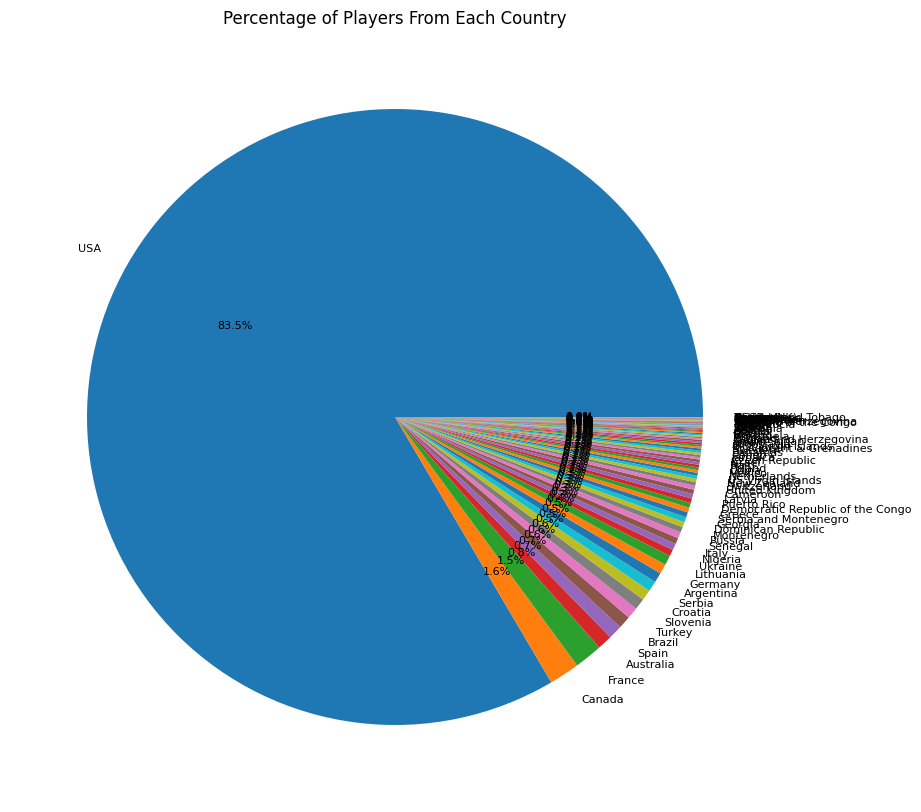

In [ ]:
# pie chart of the percentages of the countries
plt.figure(figsize=(10, 10))
plt.pie(data['country'].value_counts(), labels=data['country'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Percentage of Players From Each Country')
plt.show()



*   Majority of players are from the USA - 83.5%
*   Other top countries are Canada, France, Australia and Spain - which are all less than 2%
*   Potential bias towards players from USA - model may misrepresent players from different countries



Text(0.5, 0, 'Draft Round')

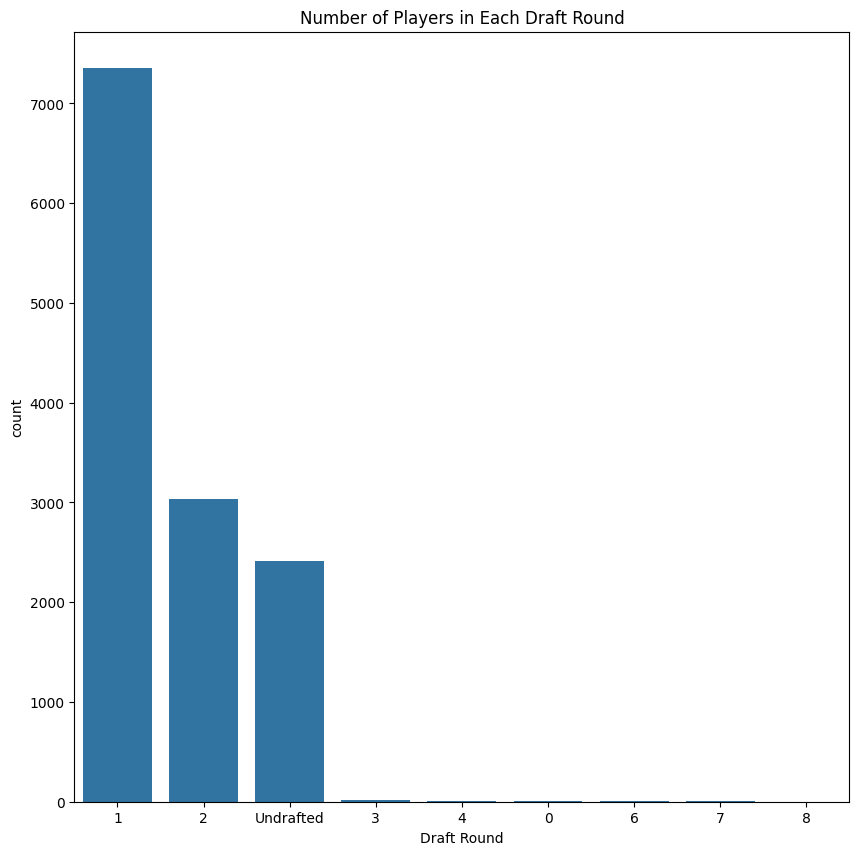

In [ ]:
# bar plot of draft round
plt.figure(figsize=(10, 10))
sns.barplot(data['draft_round'].value_counts())
plt.title('Number of Players in Each Draft Round')
plt.xlabel('Draft Round')



*   The data has many entries from players chosen from the first two draft rounds or undrafted players
*   This indicates that there were only a few draft rounds picked, so the model might be skewed since players here were only picked early or not at all



Text(0.5, 0, 'Round Number')

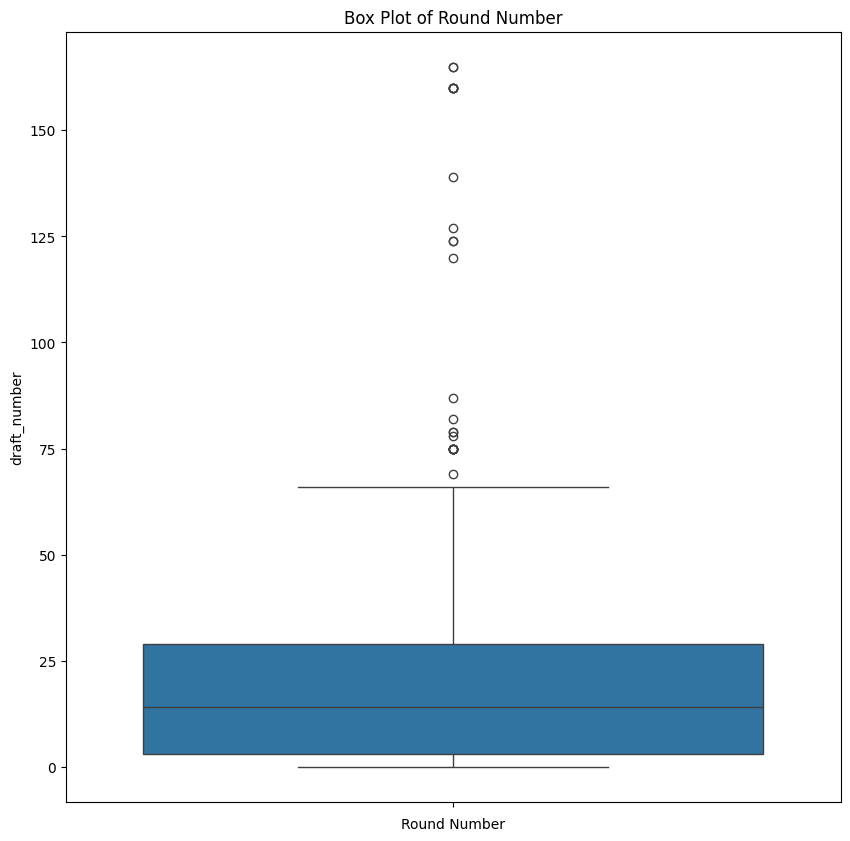

In [ ]:
# box plot of round number
plt.figure(figsize=(10, 10))
sns.boxplot(data['draft_number'])
plt.title('Box Plot of Round Number')
plt.xlabel('Round Number')




*   It seems like the players in this dataset were chosen relatively earlier in each round
*   This may be potential bias towards the earlier chosen players



Text(0.5, 0, 'Draft Year')

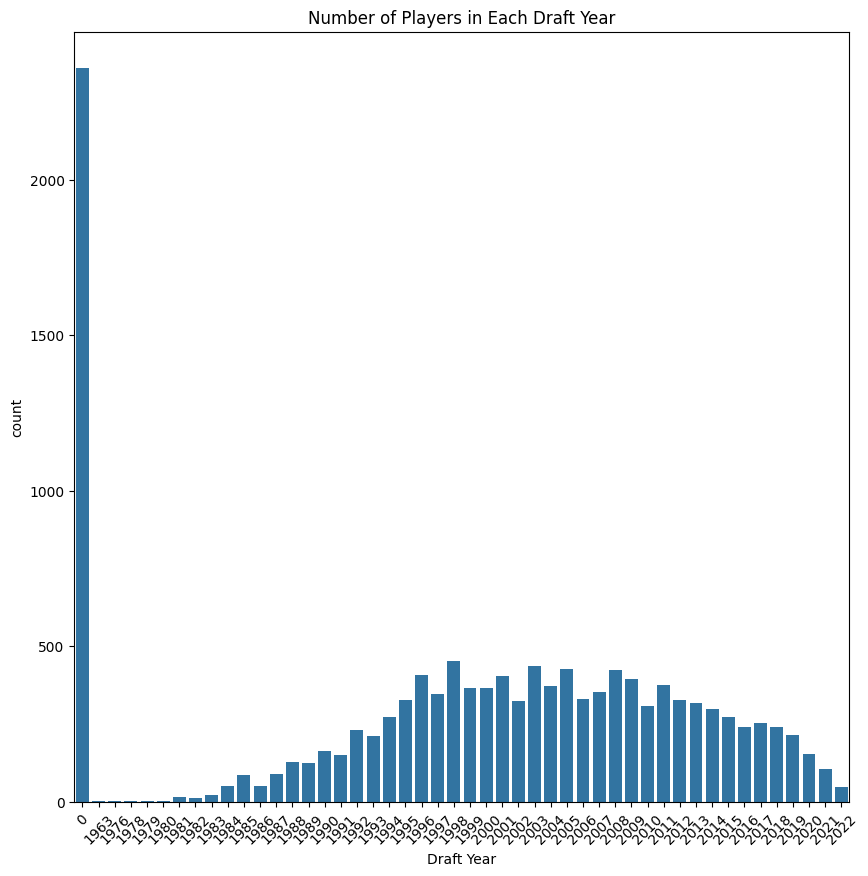

In [ ]:
# bar plot of draft year
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.barplot(data['draft_year'].value_counts())
plt.title('Number of Players in Each Draft Year')
plt.xlabel('Draft Year')

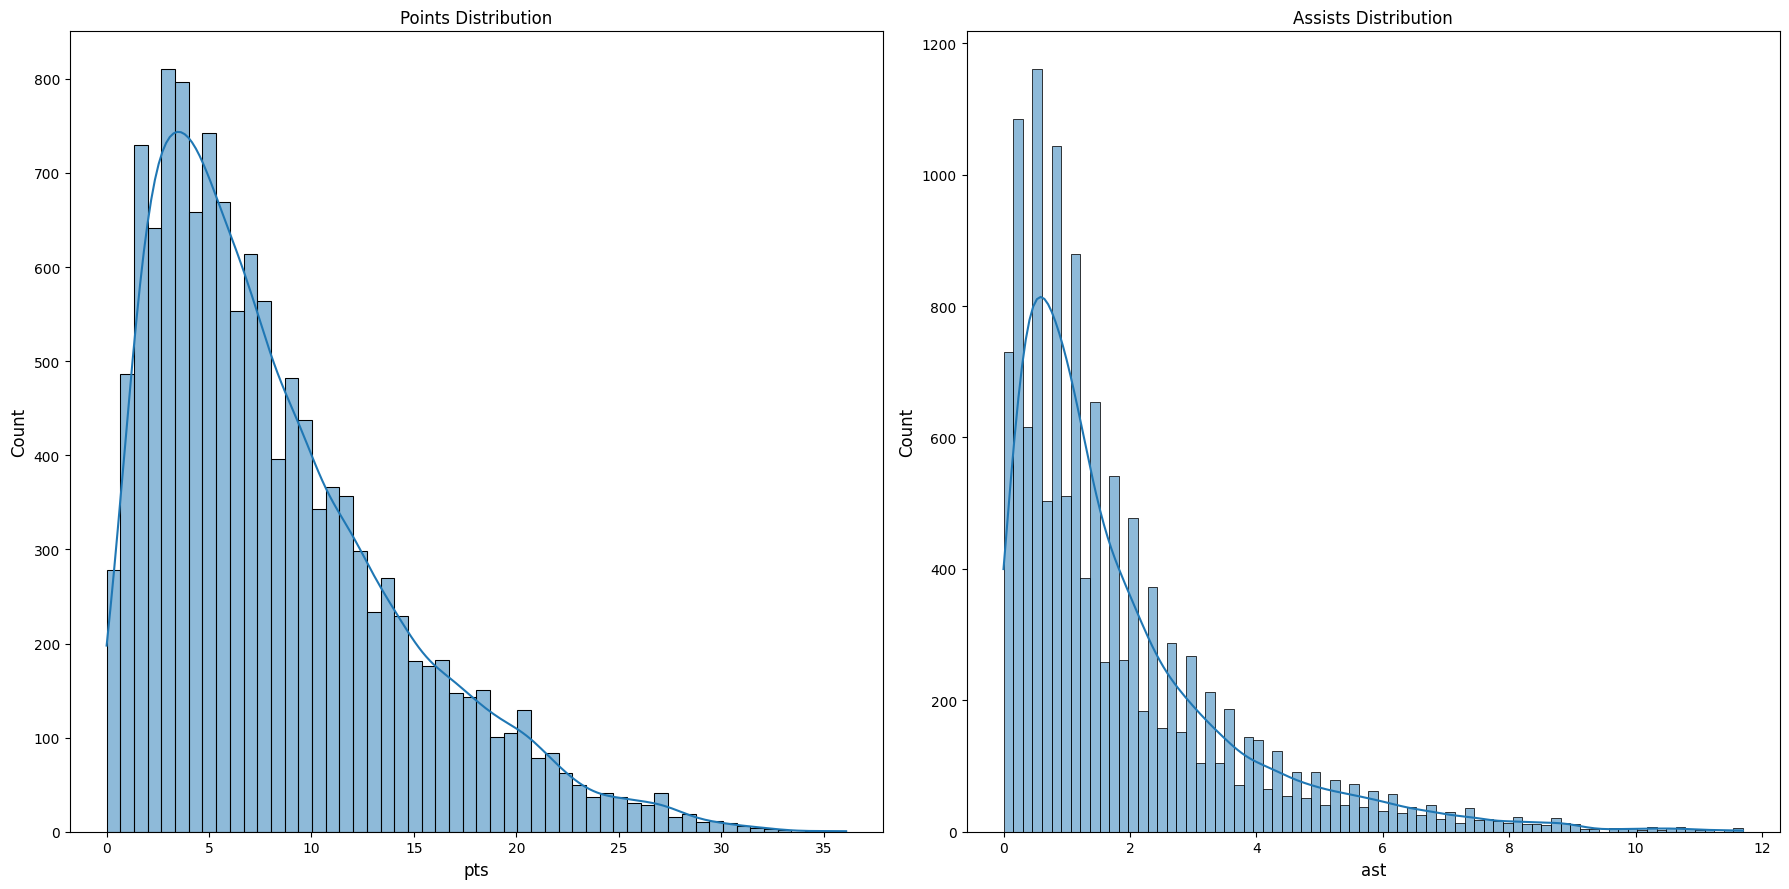

In [ ]:
# histogram and line plot of points and assists
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
key_metrics = ['pts', 'ast']
titles = ['Points Distribution','Assists Distribution']
for ax, metric, title in zip(axes, key_metrics, titles):
    sns.histplot(data[metric], kde=True, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()

#Bivariate Analysis

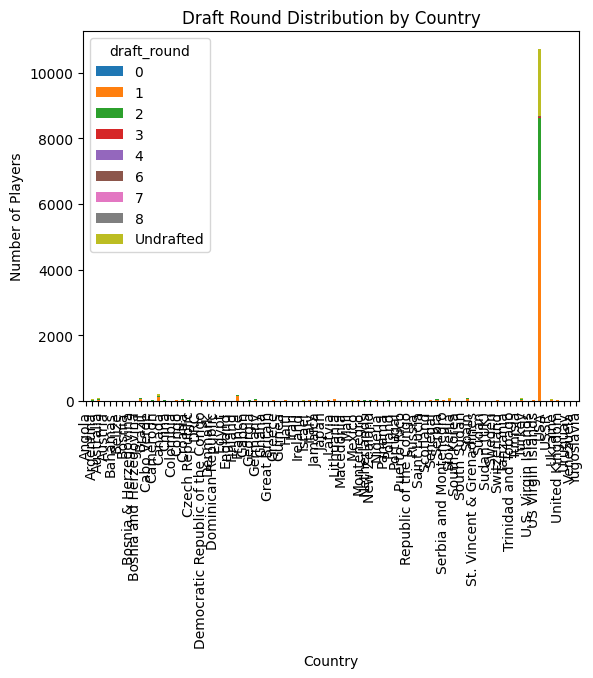

In [ ]:
# country vs draft round
country_draft_counts = data.groupby(['country', 'draft_round']).size().unstack()
# Plot a stacked bar plot
country_draft_counts.plot(kind='bar', stacked=True)
plt.title('Draft Round Distribution by Country')
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.show()


In [ ]:
# Getting the percentages of players in draft rounds for each country
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

count_by_country_round = data.groupby(['country', 'draft_round']).size().unstack(fill_value=0)
total_by_country = count_by_country_round.sum(axis=1)
percentage_by_country_round = count_by_country_round.div(total_by_country, axis=0) * 100
top_countries = total_by_country.sort_values(ascending=False).head(10).index
filtered_percentage_by_country_round = percentage_by_country_round.loc[top_countries, ['1', '2', 'Undrafted']]
bot_countries = total_by_country.sort_values(ascending=True).head(10).index
filtered_percentage_by_country_round_bottom = percentage_by_country_round.loc[bot_countries, ['1', '2', 'Undrafted']]

print("Top 10 Countries (by count) Percentages of Players in Draft Rounds:")
print(filtered_percentage_by_country_round)
print("---------------------------------------------------------------------")
print("Bottom 10 Countries (by count) Percentages of Players in Draft Rounds:")
print(filtered_percentage_by_country_round_bottom)

Top 10 Countries (by count) Percentages of Players in Draft Rounds:
draft_round          1          2  Undrafted
country                                     
USA          57.093555  23.328048  19.112023
Canada       64.878049  15.121951  20.000000
France       77.894737  13.157895   8.947368
Australia    43.000000  20.000000  37.000000
Spain        59.139785  25.806452  15.053763
Brazil       61.627907  27.906977  10.465116
Slovenia     71.052632  27.631579   1.315789
Turkey       44.736842  52.631579   2.631579
Croatia      37.500000  56.944444   5.555556
Serbia       47.142857  34.285714  18.571429
---------------------------------------------------------------------
Bottom 10 Countries (by count) Percentages of Players in Draft Rounds:
draft_round            1      2  Undrafted
country                                   
Trinidad and Tobago  0.0    0.0      100.0
Ghana                0.0  100.0        0.0
Colombia             0.0    0.0      100.0
Denmark              0.0    0.0     




*   It appears that bottom countries have a higher likelihood of being placed into the undrafted category
*   Overrepresentation of the most frequent countries, like the USA and Canada, who dominate in the first round of draft picks
*   Lack of representation in this dataset
*   Since the data doesn't have much information on the bottom countries, the results are heavily towards countries that have more entries
*   This causes bias towards the top countries, so when predicting draft round for a bottom country, it will likely be biased and place them into the undrafted category



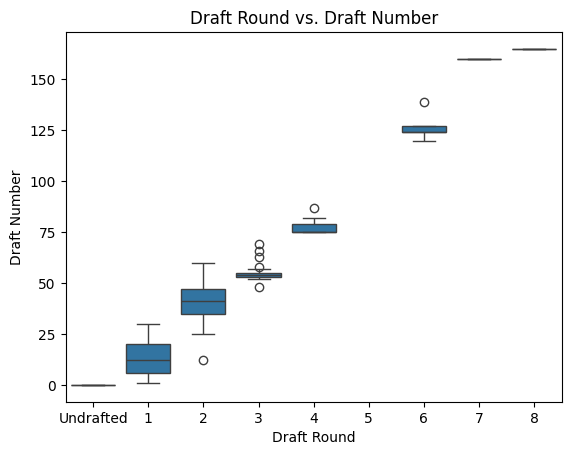

In [ ]:
# draft round vs draft number
draft_round_order = ['Undrafted', '1', '2', '3', '4', '5', '6', '7', '8']
sns.boxplot(x='draft_round', y='draft_number', data=data, order=draft_round_order)
plt.xlabel('Draft Round')
plt.ylabel('Draft Number')
plt.title('Draft Round vs. Draft Number')
plt.show()



*   As draft round increases, the draft number increases as well
*   In earlier draft rounds, the best players are often chosen so the draft number will be lower
*   This is the natural behavior of the drafting process



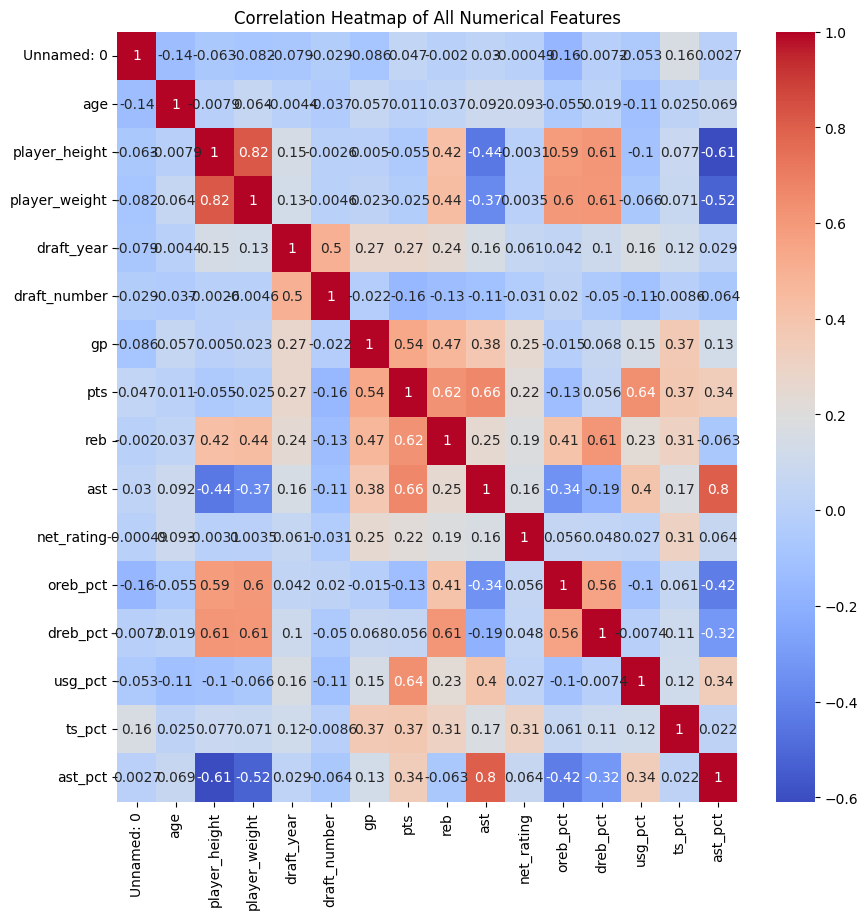

In [ ]:
# heatmap of all numerical data
plt.figure(figsize=(10, 10))
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Numerical Features')
plt.show()




*  The closer to red indicates a stronger positive correlation, the closer to blue indicates a stronger negative correlation
*   Strongest unrepetitive positive correlations: player weight and height, pts and usage percentage, assists and points, rebounds and points, games playeed and points scored
*   Strongest unrepetitive negative correlations: height/weight and assist percentage
*   It's notable to mention that players that scored more points per game were used more, it had a stronger positive cprrelation than assists. This can mean there is a bias towards players who score more points vs defensive players when it comes to usage on the court
*  It's also interesting to mention that draft_year had the strongest positive correlation with draft_number, the rest of the features generally had no correlation



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

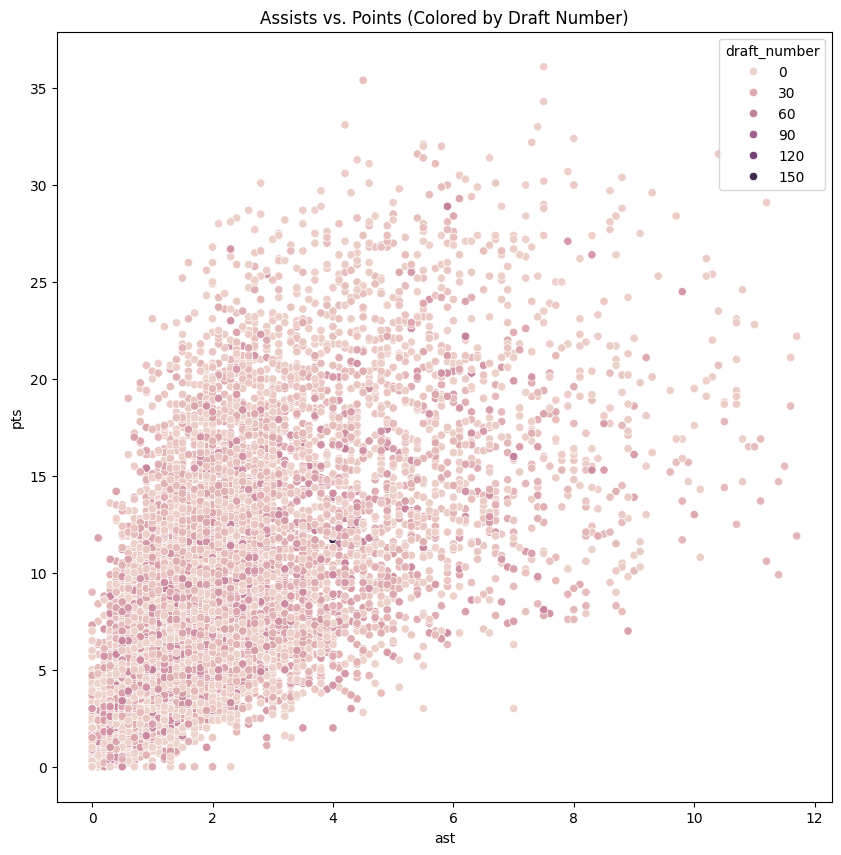

In [ ]:
# assists vs points with respect to draft number
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='ast', y='pts', hue='draft_number')
plt.title('Assists vs. Points (Colored by Draft Number)')
plt

Text(0.5, 1.0, 'Assists vs. Points (Colored by Draft Round)')

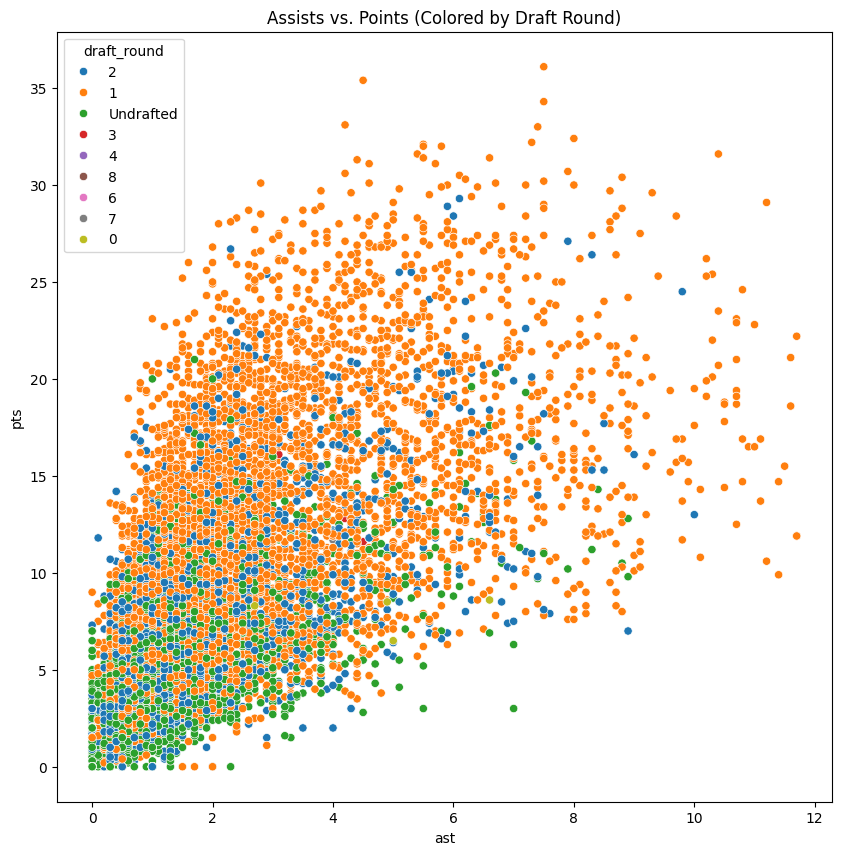

In [ ]:
# assists vs points colored by draft round
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='ast', y='pts', hue='draft_round')
plt.title('Assists vs. Points (Colored by Draft Round)')



*   Note: this makes sense that a higher number of assists and points are found in players who were drafted in earlier rounds
*   Undrafted players tended to have lower numbers



# Bias Analysis After Exploratory Data Analysis



*   Overall, there appears to be a few important points to mention regarding bias with the data itself
*   There seems to be a huge skew towards the USA since approximately 83% of players were from the USA. This can lead to overrepresentation of players from the USA, which will cause algorothmic bias when trying to predict draft round for players not from the USA.
*   The top countries by count were significantly dominating in the earlier rounds while the underrepresented countries were towards the lower to undrafted end of the spectrum. This again shows overrepresentation and as mentioned above algorothmic bias
*   There also seems to be a slight concern about the importance of points scored per game vs. assists. This can potentially favor offensive positions over defensive positions, which is a position bias and can hurt the integrity of prediction models since they will favor offensive players
*   Many datasets that sports analysts may use are similar to this since it may overrepresent countries like the USA, or put too much emphasis on players scoring points rather than defense or assists. This would create bias in predictive models because of the data, which can harm players who aren't in the majority categories or the categories favored by the data.



#Random Forest Classifier



*   I will not be scaling or standradizing the data since one of the advantages of random forests is that the data does not need it. This also works because I want to display the raw data as it is to show potential bias with the data alone.
*   I will be encoding the categorical data so that its format is compatible with the data
*   I will also be dropping columns like college since that has many missing values, player name and team abbreviation since I want to look mainly at box stats
*   I will be splitting the data into 80% training data for the model to learn, and 20% to test the predictions and see how accurate the model is
*   Draft_round is the feature being predicted since that seems to be the best predictor for the drafting process



##Feature Engineering and Data Prep

In [ ]:
# dropping college, player_name and team_abbreviation features from data
data_new = data.drop(columns=['college', 'player_name', 'team_abbreviation'])

In [ ]:
# train test split of data_new
from sklearn.model_selection import train_test_split
X = data_new.drop(columns=['draft_round'])
y = data_new['draft_round']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# checking shape of x train and test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10275, 18)
X_test shape: (2569, 18)


In [ ]:
# creating dummy variables for categorical data
X_train_dummies = pd.get_dummies(X_train, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# checking shape of x train and test again
print("X_train shape:", X_train_dummies.shape)
print("X_test shape:", X_test_dummies.shape)

X_train shape: (10275, 122)
X_test shape: (2569, 107)


In [ ]:
# making sure the shapes align
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)

In [ ]:
# checking shape of x train and test again
print("X_train shape:", X_train_dummies.shape)
print("X_test shape:", X_test_dummies.shape)

X_train shape: (10275, 122)
X_test shape: (2569, 122)


##Model

In [ ]:
# creating the initial random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_dummies, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# metric score for x train
y_pred_train = rf.predict(X_train_dummies)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00      5897
           2       1.00      1.00      1.00      2427
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
   Undrafted       1.00      1.00      1.00      1910

    accuracy                           1.00     10275
   macro avg       1.00      1.00      1.00     10275
weighted avg       1.00      1.00      1.00     10275

[[   4    0    0    0    0    0    0    0    0]
 [   0 5897    0    0    0    0    0    0    0]
 [   0    0 2427    0    0    0    0    0    0]
 [   0    0    0   16    0    0    0    0    0]
 [   0    0    0    0   10    0    0    0    0]
 [   0    0    0    0    0    5    0    0    0]
 [   0 

In [ ]:
# metric score for x test
y_pred_test = rf.predict(X_test_dummies)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99      1454
           2       0.98      0.98      0.98       605
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
   Undrafted       1.00      0.99      0.99       501

    accuracy                           0.99      2569
   macro avg       0.42      0.42      0.42      2569
weighted avg       0.98      0.99      0.99      2569

[[   0    1    0    0    0    0    1]
 [   0 1450    4    0    0    0    0]
 [   0   15  590    0    0    0    0]
 [   0    0    4    0    0    0    0]
 [   0    0    2    0    0    0    0]
 [   0    0    1    0    0    0    0]
 [   0    4    0    0    0    0  497]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# grid search to find best hyperparameters
"""
from sklearn.model_selection import GridSearchCV
rf_tuned = RandomForestClassifier(random_state=42)
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9],
}

cv_rf = GridSearchCV(rf_tuned,param_grid = params_rf,cv = 5)
cv_rf.fit(X_train_dummies,y_train)
cv_rf.score(X_test_dummies,y_test)
cv_rf.best_params_
"""

'\nfrom sklearn.model_selection import GridSearchCV\nrf_tuned = RandomForestClassifier(random_state=42)\nparams_rf = {\n        "n_estimators": [100, 250, 500],\n        "min_samples_leaf": np.arange(1, 4, 1),\n        "max_features": [0.7, 0.9],\n}\n\ncv_rf = GridSearchCV(rf_tuned,param_grid = params_rf,cv = 5)\ncv_rf.fit(X_train_dummies,y_train)\ncv_rf.score(X_test_dummies,y_test)\ncv_rf.best_params_\n'

Best features: max_features = .9, min_samples_leaf = 1, n_estimators = 100

In [ ]:
# tuned random forest
rf_tuned = RandomForestClassifier(max_features=0.9, min_samples_leaf=1, n_estimators=100, random_state=42)
rf_tuned.fit(X_train_dummies, y_train)

RandomForestClassifier(max_features=0.9, random_state=42)

In [ ]:
# metrics for x train
y_pred_train = rf_tuned.predict(X_train_dummies)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00      5897
           2       1.00      1.00      1.00      2427
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
   Undrafted       1.00      1.00      1.00      1910

    accuracy                           1.00     10275
   macro avg       1.00      1.00      1.00     10275
weighted avg       1.00      1.00      1.00     10275

[[   4    0    0    0    0    0    0    0    0]
 [   0 5897    0    0    0    0    0    0    0]
 [   0    0 2427    0    0    0    0    0    0]
 [   0    0    0   16    0    0    0    0    0]
 [   0    0    0    0   10    0    0    0    0]
 [   0    0    0    0    0    5    0    0    0]
 [   0 

In [ ]:
# metric score for x test
y_pred_test = rf_tuned.predict(X_test_dummies)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00      1454
           2       1.00      1.00      1.00       605
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
   Undrafted       1.00      1.00      1.00       501

    accuracy                           1.00      2569
   macro avg       1.00      0.93      0.95      2569
weighted avg       1.00      1.00      1.00      2569

[[   1    0    0    0    0    0    1]
 [   0 1454    0    0    0    0    0]
 [   0    1  604    0    0    0    0]
 [   0    0    0    4    0    0    0]
 [   0    0    0    0    2    0    0]
 [   0    0    0    0    0    1    0]
 [   0    0    0    0    0    0  501]]


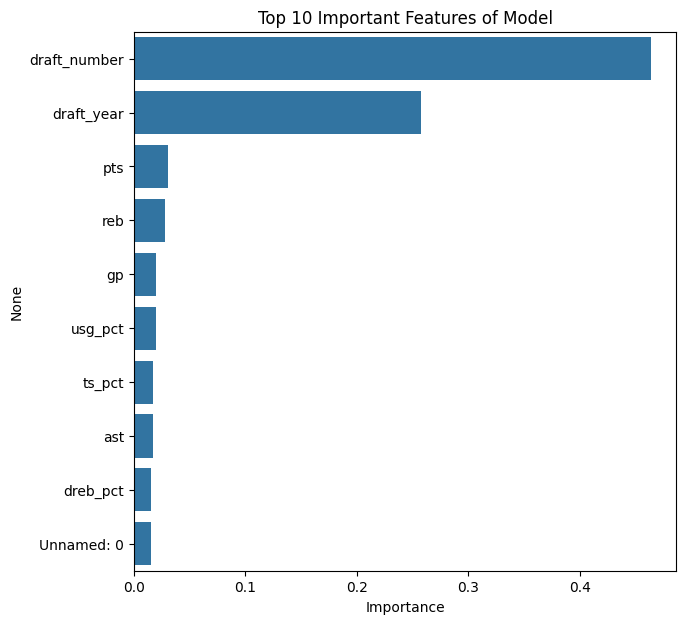

In [ ]:
# Feature importance for rf
importances = rf.feature_importances_
columns = X_train_dummies.columns
importance_dfrf = pd.DataFrame(importances, index = columns, columns = ['Importance'])
importance_dfrf_sorted = importance_dfrf.sort_values(by = 'Importance', ascending = False)
top_10_importance = importance_dfrf_sorted.head(10)

plt.figure(figsize = (7, 7))
sns.barplot(data = top_10_importance, x = top_10_importance.Importance, y = top_10_importance.index)
plt.title("Top 10 Important Features of Model")
plt.show()

##Analysis of Random Forest Classifier



*   This barplot of feature importance displays how heavily weighted and how important each feature was when predicting draft round; the top 10 features are shown here
*   The most important features were draft number and draft year, which are to be expected
*   The initial model seemed to have high accuracy throughout, and tuning it seemed to not make much of a difference
*   There is possible overfitting here, which means that the model is overrepresenting the training data and is misrepresenting the testing data
*   But in this case, I care mostly about feature importance since I'm trying to find cases of algorithmic bias



#Bias Analysis of the Model

*   What I would like to focus on here is the ranking of the other stats, specifically: points per game > games played > usage > assists
*   This ranking shows that points scored and how often a player played are more important than the number of assists a player had
*   This model shows slight bias towards points rather than assists, which can mean that players who play more offensive positions might be predicted to have higher draft rounds than those who play more support/defensive positions, which is an example of algorithmic bias